# Visualization Folktables

The sole purpose of this notebook is to visualize conducted experiments for folktables dataset. 

We use 15% of CA Income 2018 1-year slice. 

In [1]:
import json 

def get_exp_results(exp_name): 
    """
    Loads json with experimental results
    """
    path = f"experiments/results/{exp_name}.json"
    with open(path, 'r') as openfile:
            results = json.load(openfile)
    return results

In [2]:
import pandas as pd
def print_exp_info(exp_name, show_results=True):
    info = get_exp_results(exp_name)
    for k, v in info.items():
        if isinstance(v, str):
            print(f"{k}:::{v[:50]}")
        elif isinstance(v, list):
            if show_results:
                for i, elem in enumerate(v):
                    print(f"{k}#{i}:::{elem[:50]}")
        else:
            print(f"{k}:::{v}")
                  

In [3]:
import matplotlib.pyplot as plt

def visualize_2d_results(exp_name, labels=["accuracy", "fairness"], inv=True,
                        ignore_first=True):
    info = get_exp_results(exp_name)
    result = info["result"]
    if ignore_first:
        for i in range(len(result)):
            result[i] = result[i][1:]
    if inv:
        result = result[::-1]
        labels = labels[::-1]
    fig = plt.figure(figsize = (10, 8))
    plt.plot(result[0], result[1], label = "Pareto Curve", color = 'purple')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.show()
    

In [4]:
import matplotlib.tri as tri

ORDERS = [(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

def visualize_3d_results(exp_name, 
                         labels=["accuracy", "robustness", "fairness"],
                         ignore_first=True, mode='3D'):
    info = get_exp_results(exp_name)
    result = info["result"]
    if ignore_first:
        for i in range(len(result)):
            result[i] = result[i][1:]

    fig = plt.figure(figsize = (10, 14))
    for i in range(len(ORDERS)):
        order = ORDERS[i]
        x = result[order[0]]
        y = result[order[1]]
        z = result[order[2]]
        if mode == "3D":
            ax1 = fig.add_subplot(3, 2, 1 + i, projection='3d', label = "Pareto Plane")
            ax1.scatter(x, y, z)
            ax1.set_zlabel(labels[order[2]])
        else:
            ax1 = fig.add_subplot(3, 2, 1 + i, label = "Countur Levels")
            ax1.tricontourf(x, y, z)
            ax1.set_title(f"Countur plot for {labels[order[2]]}")
            triang = tri.Triangulation(x, y)
            tcf = ax1.tricontourf(triang, z)
            fig.colorbar(tcf)
        ax1.set_xlabel(labels[order[0]])
        ax1.set_ylabel(labels[order[1]])
        
    plt.show()

In [5]:
from experiments.exp_tools import aggregate_result

In [6]:
def collect_exp_results(exp_name, task_num):
    aggregate_result(f"experiments/results/raw_results/{exp_name}/", f"experiments/results/{exp_name}.json", task_num)

In [7]:
def compare_experiments_2d(fst_exp_name, snd_exp_name, dataset_labels = ["adult", "folktables"],
                        labels=["accuracy", "fairness"], inv=True,
                        ignore_first=True):
    results = []
    for exp_name in (fst_exp_name, snd_exp_name):
        info = get_exp_results(exp_name)
        result = info["result"]
        if ignore_first:
            for i in range(len(result)):
                result[i] = result[i][1:]
        if inv:
            result = result[::-1]
        results.append(result)
    if inv:
        labels = labels[::-1]
    fig = plt.figure(figsize = (10, 8))
    plt.plot(results[0][0], results[0][1], label = dataset_labels[0], color = 'purple')
    plt.plot(results[1][0], results[1][1], label = dataset_labels[1], color = 'orange')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.show()

# Data Visualization

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from source.data_tools.preprocessing import prepare_cv_datasets

In [23]:
x = np.load("data/folktables/folk_x.npy")
y = np.load("data/folktables/folk_y.npy")
groups = np.load("data/folktables/folk_groups.npy")


In [24]:
for X_train, y_train, X_test, y_test, groups_train, groups_test in prepare_cv_datasets(x, y, groups, 5):
    break

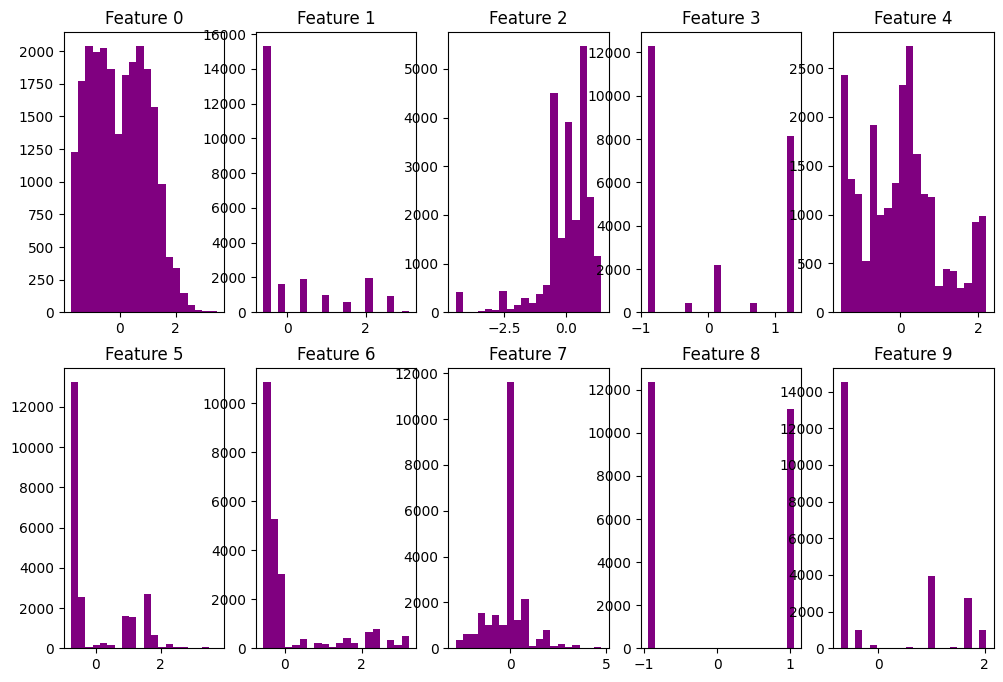

In [29]:
fig, axs = plt.subplots(2, 5, figsize=(12, 8))
#axs[0, 0].plot(x, y)
#axs[0, 0].set_title('Axis [0, 0]')
for i in range(x.shape[1]):
    axs[i // 5, i % 5].hist(X_train[:, i], color='purple', bins=20)
    #axs[i // 5, i % 5].set_xlabel("Feature values")
    axs[i // 5, i % 5].set_title(f"Feature {i}")


# Group fairness vs Acc (2d)

## Experiment 11

In [5]:
print_exp_info("exp11")

name:::exp1
descr:::Group Fairness vs Acc, linear grid, 10
result#0:::[0.5953321976149915, 0.7635434412265758, 0.7675638841567292, 0.7703577512776831, 0.7730834752981262, 0.7753321976149914, 0.7776149914821124, 0.7790800681431005, 0.7791141396933561, 0.779557069846678]
result#1:::[1.0, 0.999643119293847, 0.9989496390185199, 0.9979501175063502, 0.9967320908732399, 0.9949362680220553, 0.9924301973913463, 0.9900512990853721, 0.987034751601801, 0.9830707568350997]


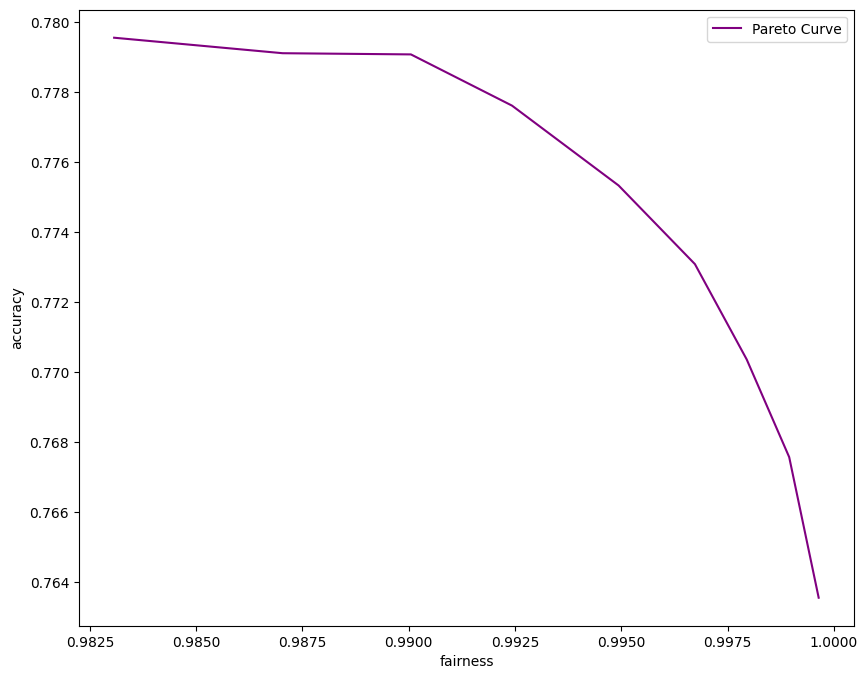

In [19]:
visualize_2d_results("exp11")

### Adult and folk tables together

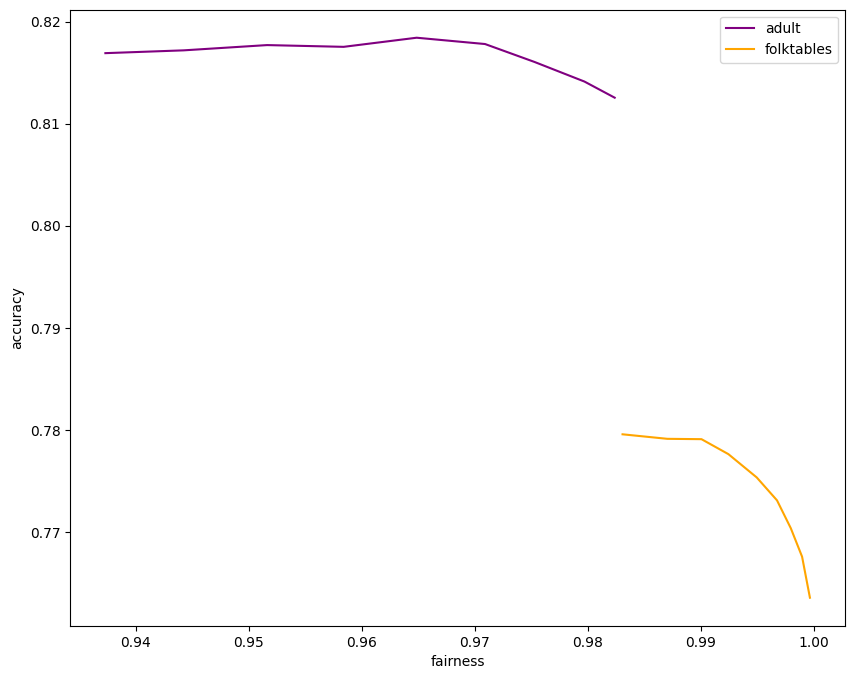

In [32]:
compare_experiments_2d("exp1", "exp11")

## Experiment 15 (grid_sz = 100)

In [40]:
print_exp_info("exp15")

name:::exp15
descr:::Group Fairness vs Acc, linear grid, 100
result#0:::[0.5953321976149915, 0.7594548551959115, 0.7596933560477002, 0.7603066439522997, 0.7608517887563885, 0.761090289608177, 0.7614991482112436, 0.7615672913117548, 0.7619420783645655, 0.762282793867121, 0.7629642248722317, 0.7635434412265758, 0.7641567291311755, 0.7644633730834753, 0.7650425894378194, 0.7656218057921635, 0.7662010221465076, 0.7664054514480408, 0.7668143100511073, 0.7670868824531516, 0.7670187393526406, 0.7673253833049405, 0.7675638841567292, 0.7679045996592844, 0.7679727427597955, 0.7681431005110733, 0.768381601362862, 0.768756388415673, 0.7692333901192504, 0.7694037478705281, 0.7694718909710392, 0.7701533219761499, 0.770289608177172, 0.7703577512776831, 0.770664395229983, 0.7707666098807495, 0.7709710391822827, 0.7712776831345826, 0.7713458262350936, 0.7715843270868825, 0.7716524701873936, 0.772129471890971, 0.7724701873935265, 0.7727768313458262, 0.7730834752981262, 0.7730494037478706, 0.773594548551

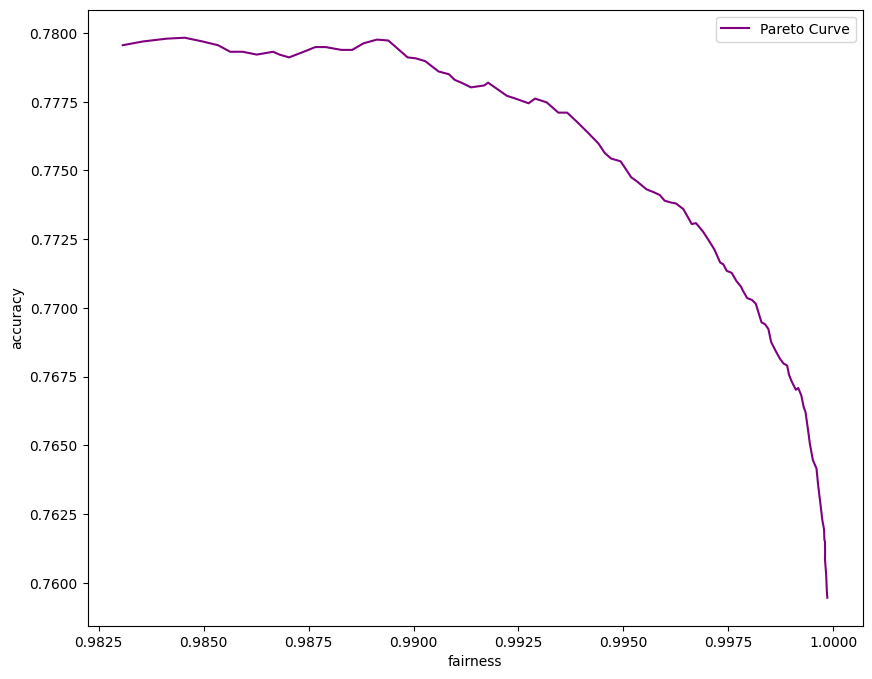

In [41]:
visualize_2d_results("exp15")

# Ind Fairness vs Acc, 2d

## Experiment 12 (ind fairness vs acc, linear grid, 10)

In [26]:
print_exp_info("exp12")g

name:::exp12
descr:::Ind Fairness vs Acc with 10 grid size
result#0:::[0.43802385008517886, 0.7542419080068143, 0.7777853492333902, 0.7802044293015331, 0.7800681431005111, 0.7799659284497444, 0.7798977853492334, 0.7798637137989779, 0.78, 0.779557069846678]
result#1:::[0.7524245848580444, 0.8492427455660213, 0.8255845504292006, 0.8181378614196083, 0.8131854452977176, 0.8102680608024707, 0.8082738772920101, 0.8067918473107494, 0.8054335105874377, 0.8040396114338634]


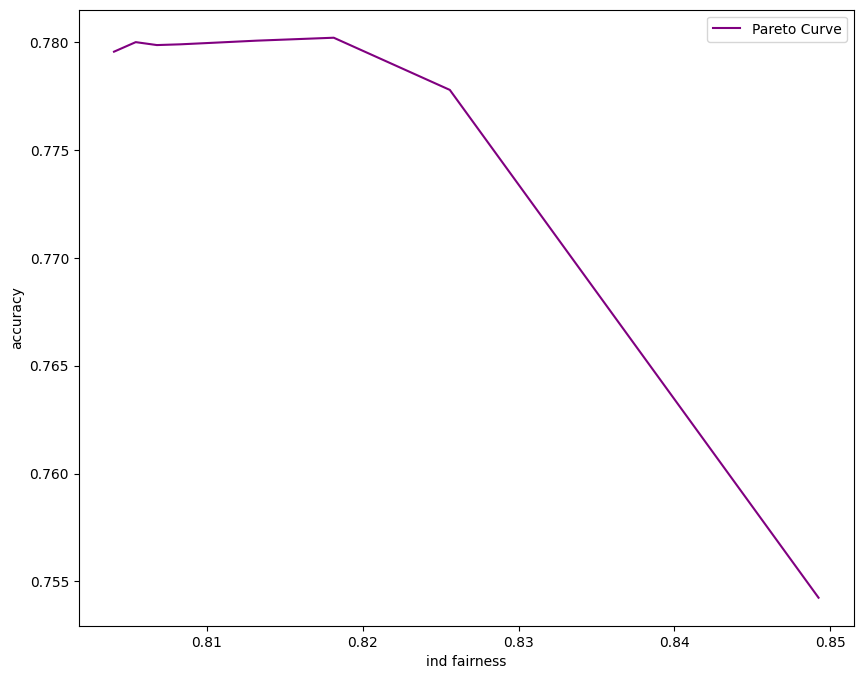

In [27]:
visualize_2d_results("exp12", labels=["accuracy", "ind fairness"])

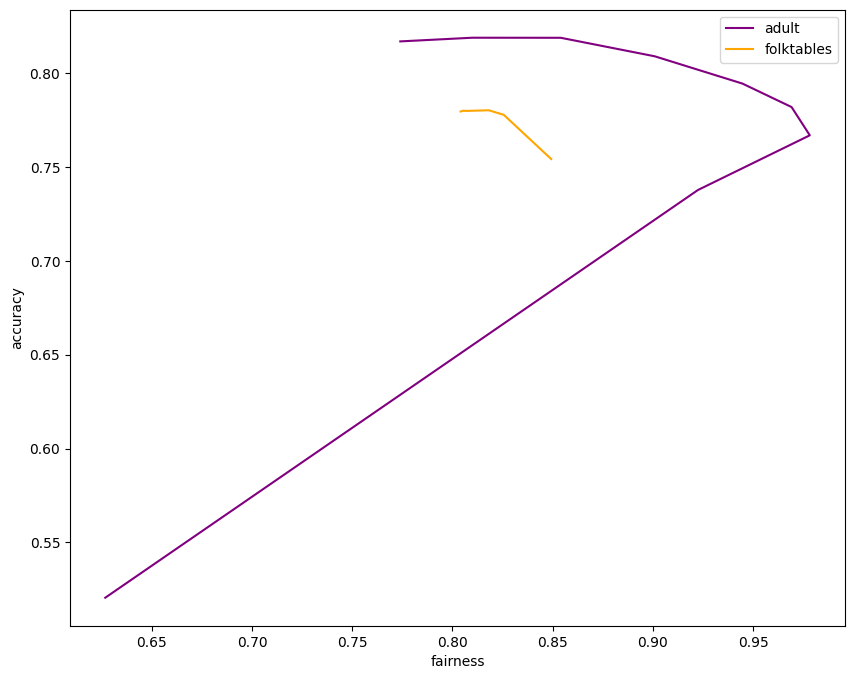

In [33]:
compare_experiments_2d("exp8", "exp12")

## Experiment 14 (grid_sz = 100)

In [42]:
print_exp_info("exp14")

name:::exp14
descr:::Ind Fairness vs Acc with 100 grid size
result#0:::[0.43802385008517886, 0.4800340715502555, 0.5599659284497445, 0.6193185689948892, 0.6406814310051108, 0.6527086882453152, 0.6713117546848382, 0.6930494037478706, 0.7173764906303237, 0.7339011925042589, 0.7467461669505961, 0.7542419080068143, 0.7601022146507667, 0.7642930153321976, 0.7669505962521295, 0.7705281090289609, 0.7721976149914822, 0.7728449744463373, 0.7755366269165247, 0.7764906303236797, 0.777137989778535, 0.777717206132879, 0.7777853492333902, 0.7780238500851789, 0.7783304940374787, 0.7788756388415672, 0.7788415672913118, 0.7787393526405451, 0.7789097103918229, 0.7789778534923338, 0.7792504258943783, 0.7792504258943781, 0.7796252129471891, 0.7802044293015331, 0.7802385008517888, 0.7800681431005111, 0.7802385008517887, 0.7802725724020443, 0.7804088586030664, 0.7802725724020443, 0.7801703577512777, 0.7798637137989778, 0.7799659284497444, 0.7800681431005111, 0.7800681431005111, 0.7798296422487223, 0.7801362

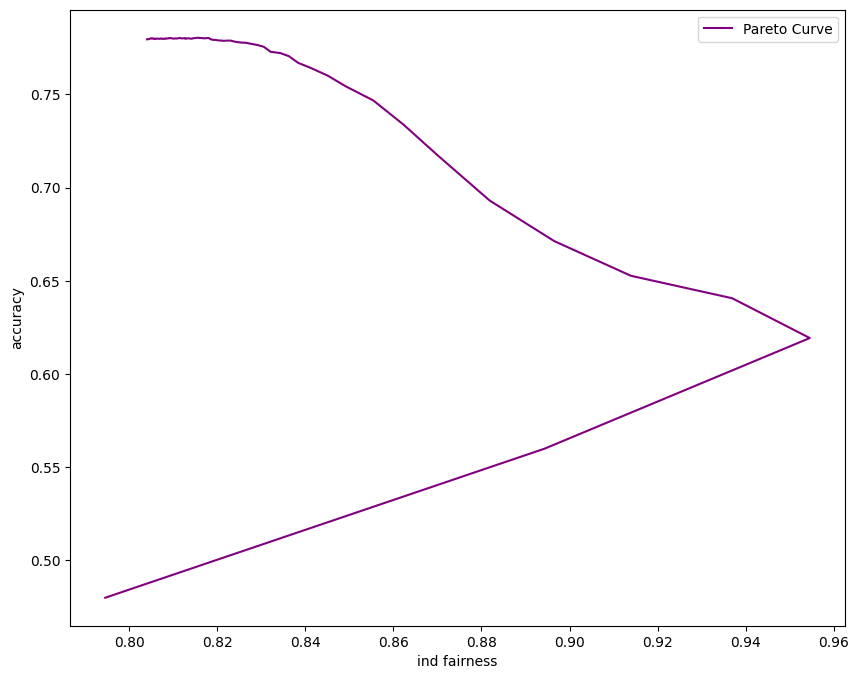

In [43]:
visualize_2d_results("exp14", labels=["accuracy", "ind fairness"])

# Comparing ind and group fairness vs acc

Here we compare how optimizing individual fairness differs from optimizing group fairness with respect to accuracy (it's exp2 vs exp8 plots essentially)

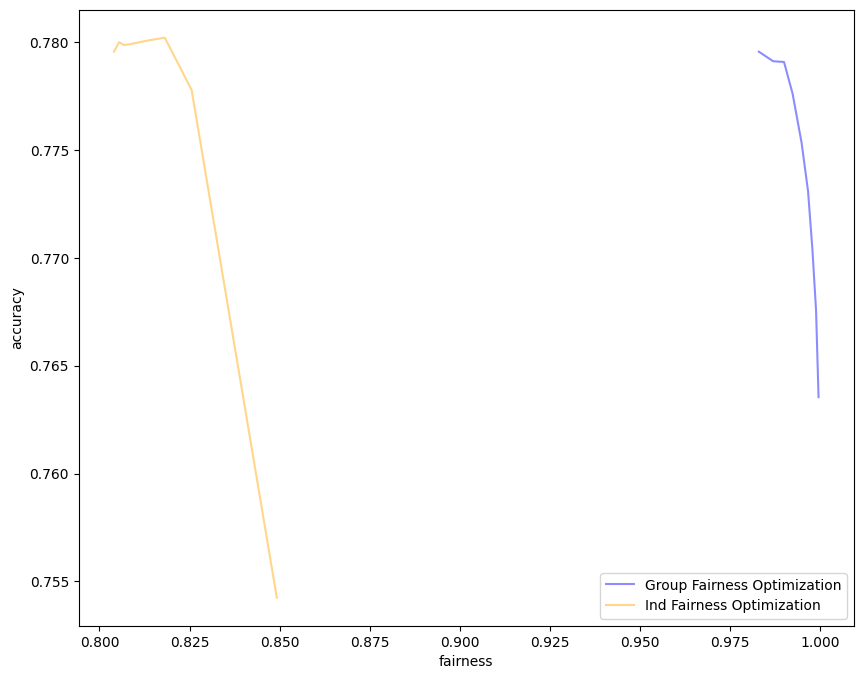

In [36]:
import numpy as np
fig = plt.figure(figsize = (10, 8))

group_fairness = get_exp_results("exp11")['result'][::-1]
plt.plot(group_fairness[0][1:], group_fairness[1][1:], label = "Group Fairness Optimization", color = 'blue', alpha=0.45)
ind_fairness = get_exp_results("exp12")['result'][::-1]
plt.plot(ind_fairness[0][1:], ind_fairness[1][1:], label = "Ind Fairness Optimization", color = 'orange', alpha=0.45)

plt.xlabel("fairness")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Experiment 14
...

# Robustness vs Acc, 2d

## Experiment 13

In [38]:
print_exp_info("exp13")

name:::exp13
descr:::Robustness vs Acc with 10 grid size
result#0:::[0.5953321976149915, 0.6985008517887563, 0.6295059625212948, 0.6624531516183987, 0.5953321976149915, 0.5953321976149915, 0.6661669505962521, 0.6947529812606474, 0.7289267461669506, 0.779557069846678]
result#1:::[0.9999999999999645, 0.15403523981528963, 0.729256681840638, 0.4562774388163021, 0.9999999999999645, 0.9999999999999645, 0.45843494372982674, 0.1678822458535399, -0.11019648076416719, -0.4877936473077332]


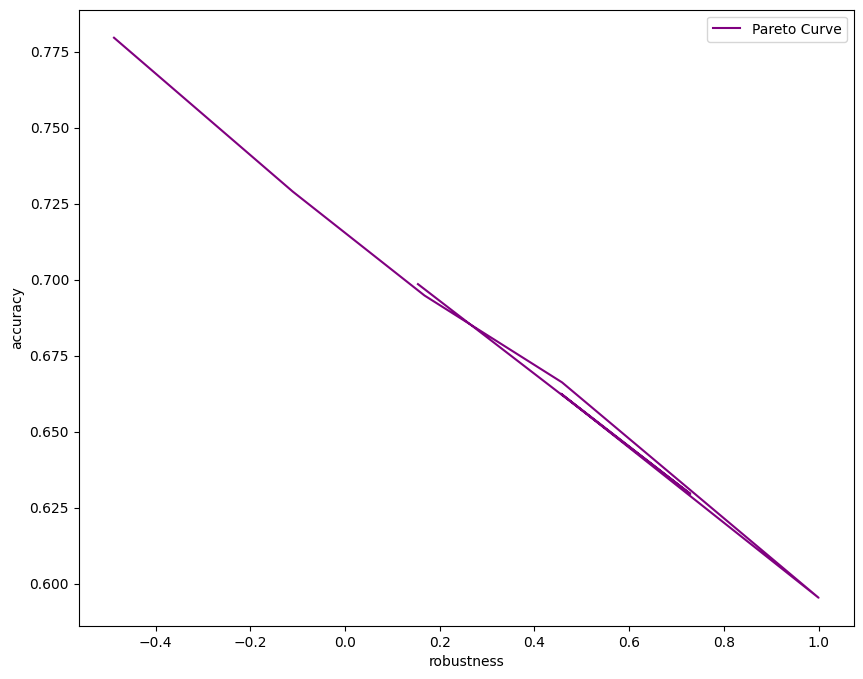

In [39]:
visualize_2d_results("exp13", labels=["accuracy", "robustness"])

## Changing eps for robustness:

If I put super small eps, the optimizer converges, since robustness does not matter anymore. If I put large enough eps, it does not converge. That led me to believe there might be such an eps value that robustness is meaningful and at the same time converges

### Exp 19 (eps = 0.0001)

In [37]:
print_exp_info("exp19")

name:::exp18
descr:::l_2-Robustness with eps=0.0001
result#0:::[0.5913685406019308, 0.7724020442930154, 0.7743327654741624, 0.7768313458262351, 0.7787052810902896, 0.7787620670073823, 0.7786484951731971, 0.7792163543441225, 0.7798409994321408, 0.780068143100511]
result#1:::[1.0, 1.0, 0.9999810713609691, 0.9999772856331629, 1.0, 1.0, 0.9999981071360969, 1.0, 0.9999469998107137, 1.0]


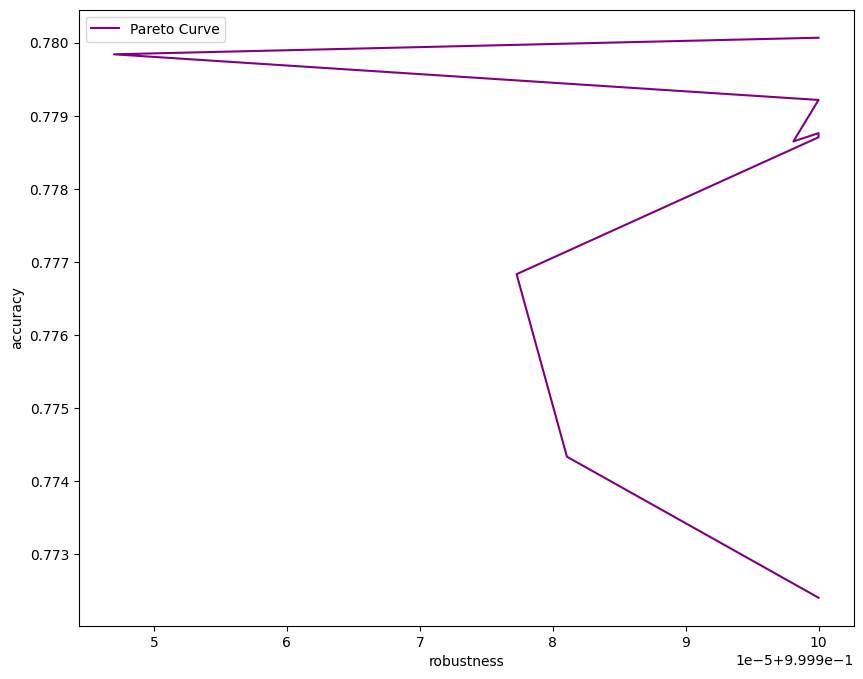

In [38]:
visualize_2d_results("exp19", labels=["accuracy", "robustness"])

# Adversarial robustness

## Experiment 23

In [8]:
print_exp_info("exp23")

name:::exp23
descr:::logloss-adv max robustness
result#0:::[0.780068143100511, 0.780068143100511, 0.780068143100511, 0.780068143100511, 0.780068143100511, 0.780068143100511, 0.780068143100511, 0.780068143100511, 0.780068143100511, 0.780068143100511]
result#1:::[0.48444112578225557, 0.4844423982477908, 0.4844432340157423, 0.4844441971324202, 0.4844453857006224, 0.48444645943562065, 0.4844474659966755, 0.4844482349991785, 0.4844497463707469, 0.4844501835916237]


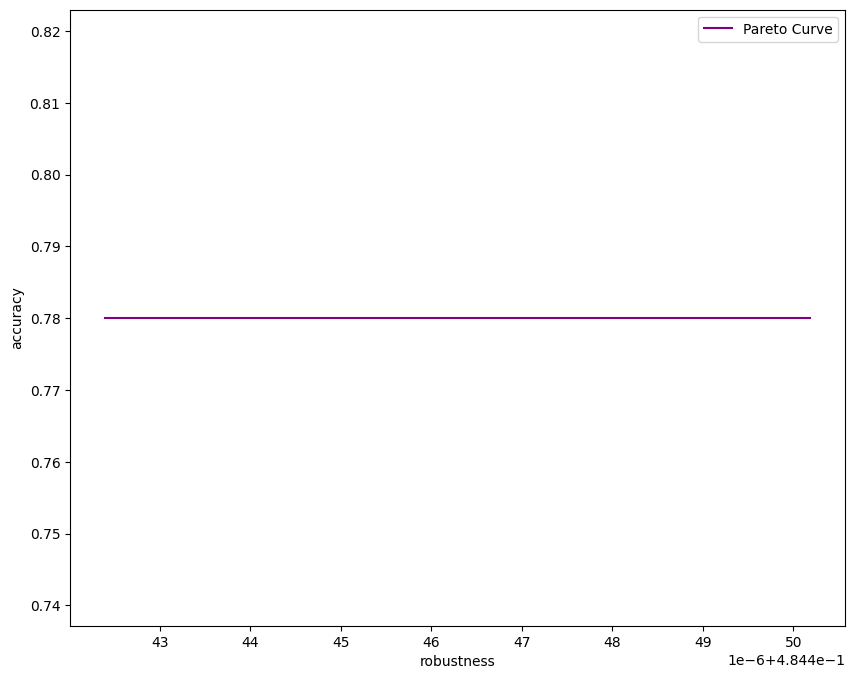

In [9]:
visualize_2d_results("exp23", labels=["accuracy", "robustness"])

### Exp 24

In [15]:
print_exp_info("exp24")

name:::exp23
descr:::logloss-adv max robustness
result#0:::[0.7789892106757524, 0.7791027825099374, 0.7794434980124928, 0.7794434980124928, 0.7791027825099374, 0.7797842135150482, 0.7798977853492334, 0.7800113571834185, 0.780068143100511, 0.780068143100511]
result#1:::[0.4488011894069466, 0.4497804755260855, 0.45074234302207067, 0.4516851570764637, 0.4526091338102585, 0.4535148689732614, 0.45440327929944185, 0.45527454190741573, 0.456128529720254, 0.4569663818213041]


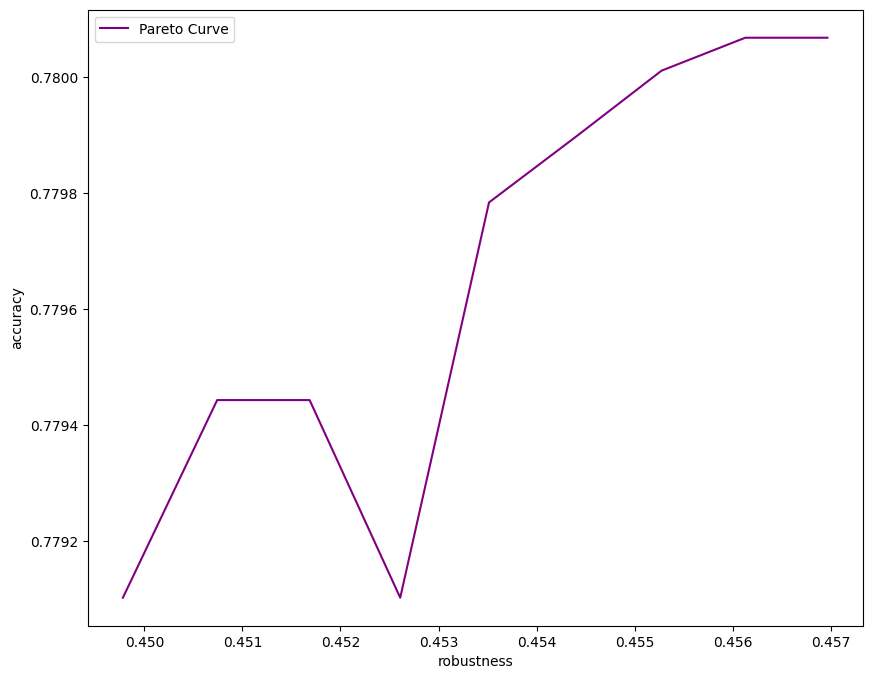

In [16]:
visualize_2d_results("exp24", labels=["accuracy", "robustness"])

# Exp 25

In [17]:
print_exp_info("exp25")

name:::exp23
descr:::logloss-adv max robustness
result#0:::[0.7737649063032368, 0.7744463373083476, 0.7755820556501988, 0.7773424190800681, 0.7785917092561044, 0.778534923339012, 0.778534923339012, 0.7786484951731971, 0.7795002839295856, 0.780068143100511]
result#1:::[0.33398458128700187, 0.33648339424696544, 0.3382733493654961, 0.3394363325946224, 0.3400367476485375, 0.3401256195102867, 0.33974177337714534, 0.33891471200737683, 0.33766497028709885, 0.3360059229169308]


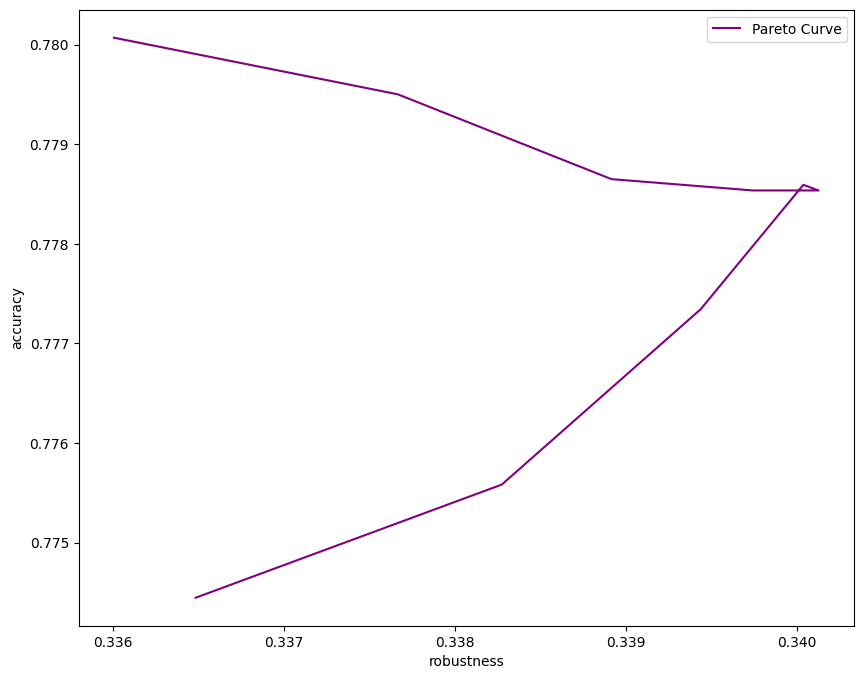

In [18]:
visualize_2d_results("exp25", labels=["accuracy", "robustness"])

# EXP 26

In [19]:
print_exp_info("exp26")

name:::exp26
descr:::logloss-adv max robustness
result#0:::[0.7772742759795571, 0.7775127768313459, 0.777649063032368, 0.7778194207836457, 0.7780579216354344, 0.7780238500851789, 0.7783645655877341, 0.7786030664395229, 0.7787393526405452, 0.7790800681431005, 0.7794207836456559, 0.779557069846678]
result#1:::[0.39833813523274275, 0.4001153207966296, 0.40179674243809715, 0.4033869180128555, 0.4048907894639521, 0.40631135347723946, 0.4076529888729602, 0.4089189879216032, 0.4101130825798765, 0.41123691051561834, 0.4122936735415916, 0.41328577826719615]


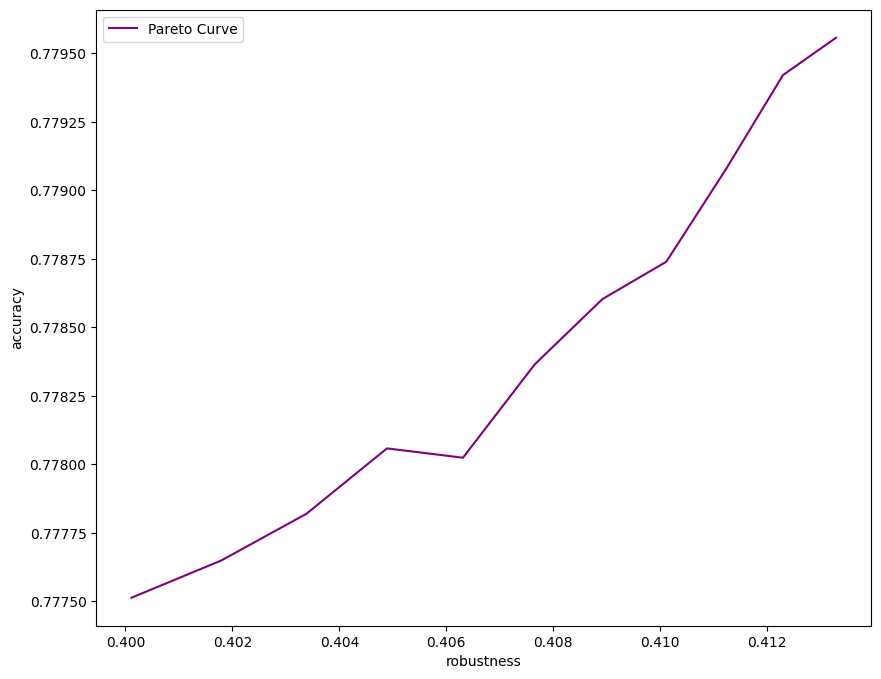

In [20]:
visualize_2d_results("exp26", labels=["accuracy", "robustness"])

# Exp 27

In [21]:
print_exp_info("exp27")

name:::exp26
descr:::logloss-adv max robustness
result#0:::[0.7772742759795571, 0.7774105621805794, 0.7775468483816013, 0.777649063032368, 0.7776149914821124, 0.7776490630323679, 0.7777512776831347, 0.7778194207836456, 0.7779557069846679, 0.77809199318569, 0.7780579216354345, 0.7780238500851789, 0.7781942078364565, 0.7783304940374787, 0.7785008517887564, 0.7785349233390119, 0.7786371379897785, 0.7788756388415672, 0.7789097103918228, 0.7787052810902895, 0.7791482112436116, 0.7792504258943782, 0.7793867120954003, 0.7796592844974446, 0.779557069846678]
result#1:::[0.39833810823059196, 0.3991652215603151, 0.39997094124859356, 0.4007571257640935, 0.4015232383308621, 0.40227006203154525, 0.40299781858583705, 0.4037072564988208, 0.40439865517618456, 0.40507282342311324, 0.4057293177337987, 0.4063689692049757, 0.4069920945783971, 0.40759860989214636, 0.4081893242776585, 0.4087647023902578, 0.40932433417320596, 0.4098696200279022, 0.41040022836947293, 0.41091597385929574, 0.41141770926257026, 0

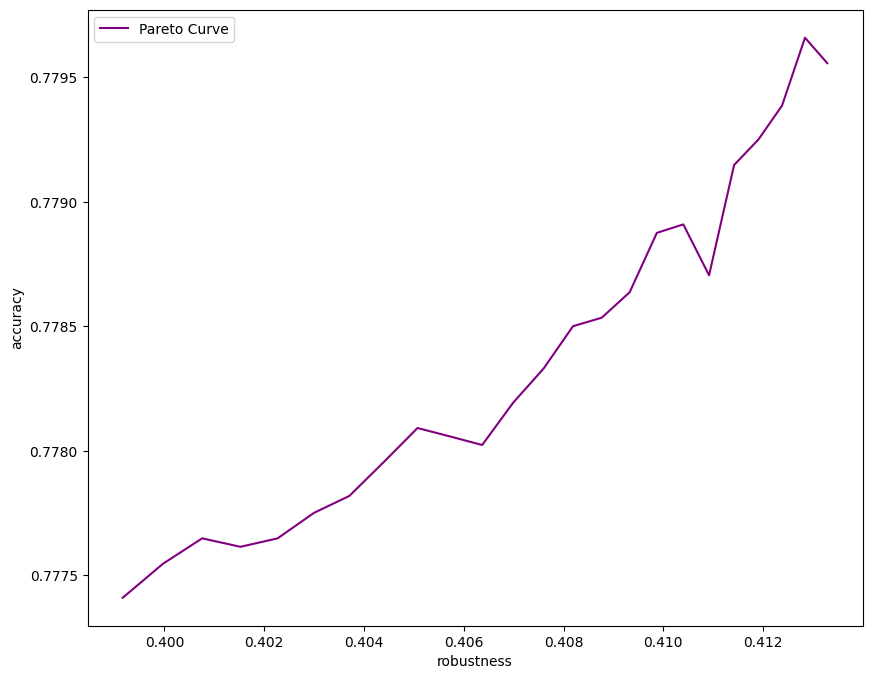

In [22]:
visualize_2d_results("exp27", labels=["accuracy", "robustness"])

# 3D in sklearn 

## Exp 28 (adv rob vs group fair vs acc)

In [102]:
print_exp_info("exp28", False)

name:::exp28
descr:::logloss-adv max robustness vs group fairness


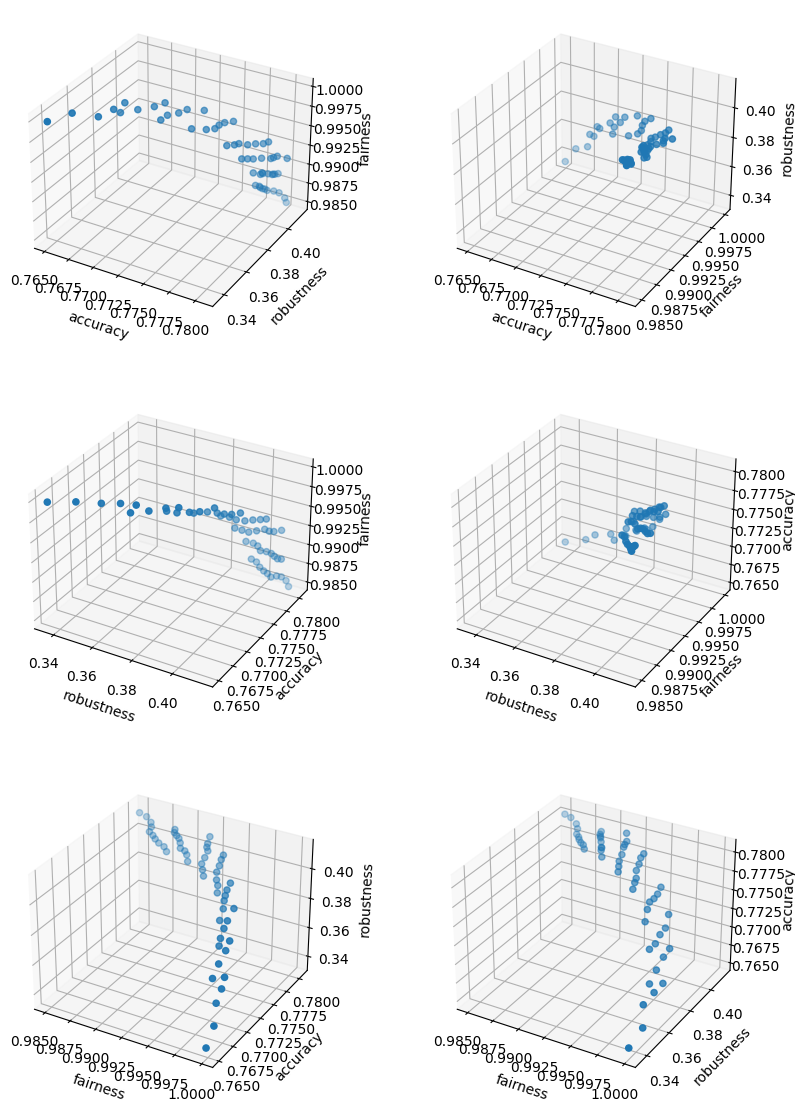

In [97]:
visualize_3d_results("exp28", mode='3D')

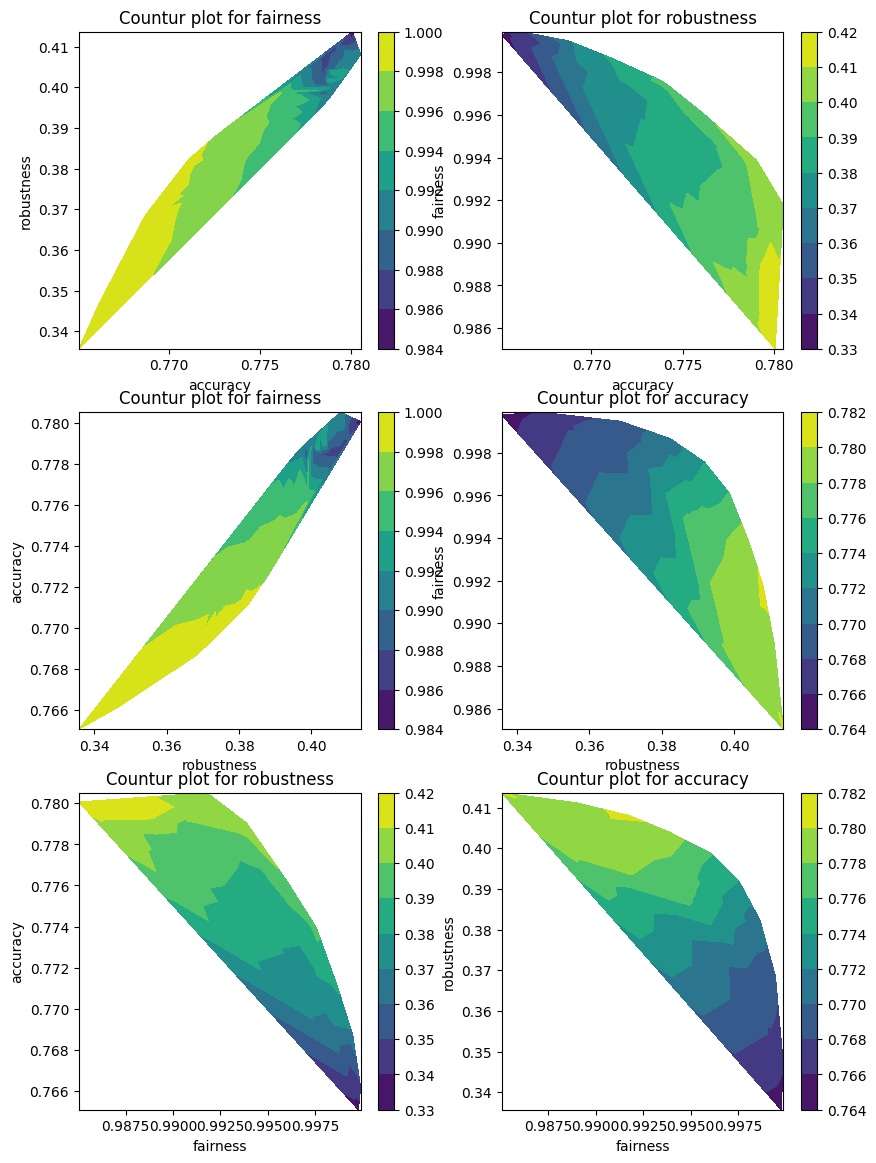

In [100]:
visualize_3d_results("exp28", mode='levels')

# Exp 29 (acc vs group fairness vs ind fairness) 

In [103]:
print_exp_info("exp29", False)

name:::exp28
descr:::acc vs ind fairness vs group fairness


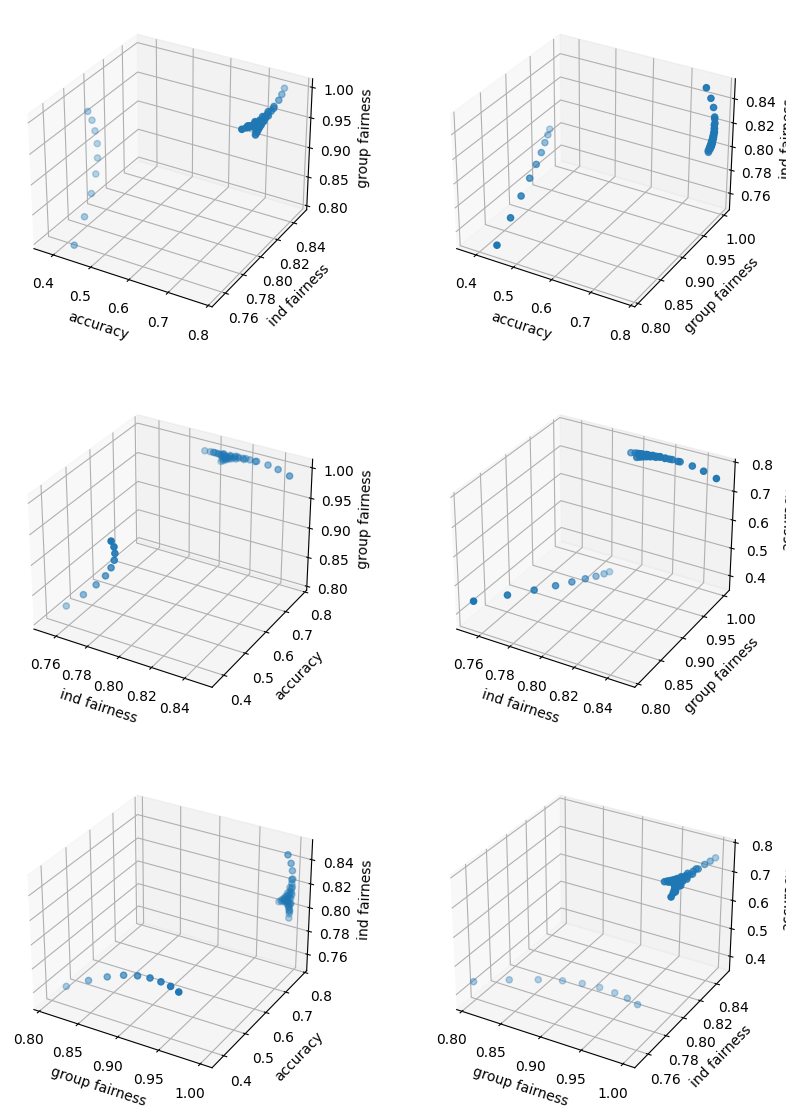

In [10]:
visualize_3d_results("exp29", labels=["accuracy", "ind fairness", "group fairness"],mode='3D')

# the line with low accuracy stands for 0 weight by accuracy

In [107]:
# visualize_3d_results("exp29", labels=["accuracy", "ind fairness", "group fairness"],mode='levels')